# Safest Neighborhood in Pittsburgh in terms of Non-Traffic Citations

In [1]:
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

#### Code Below - Reading in the data from the Non-Traffic-Citations.csv file into a dataframe    
#### and organizing dataframe and organizing it into Neighborhoods and Total Citations

In [2]:
data = pd.read_csv("Non-Traffic-Citations.csv")

citations_In_Neighborhood = data.groupby("NEIGHBORHOOD").size()

d2 = pd.DataFrame( {"number of citations" : citations_In_Neighborhood} )

d2.reset_index(inplace=True)

d2.columns = [ " Neighborhood " , " Number of Citations " ]

print( d2 )

          Neighborhood    Number of Citations 
0      Allegheny Center                    157
1        Allegheny West                     24
2             Allentown                    187
3             Arlington                    102
4     Arlington Heights                      7
..                  ...                    ...
92  Upper Lawrenceville                     34
93             West End                     31
94         West Oakland                     63
95             Westwood                     36
96              Windgap                     16

[97 rows x 2 columns]


#### Code Below - Merging the data in the Non-Traffic Citations DataSet with the Neighborhoods map folder.

               hood  Number_of_Citations  \
0   Central Oakland                659.0   
1     North Oakland                197.0   
2      West Oakland                 63.0   
3  Crawford-Roberts                 97.0   
4    Strip District                101.0   

                                            geometry  
0  POLYGON ((-79.95304 40.44203, -79.95302 40.442...  
1  POLYGON ((-79.95455 40.45882, -79.95427 40.458...  
2  POLYGON ((-79.96230 40.44294, -79.96220 40.442...  
3  POLYGON ((-79.98275 40.44641, -79.98273 40.446...  
4  POLYGON ((-79.97494 40.45629, -79.97484 40.456...  


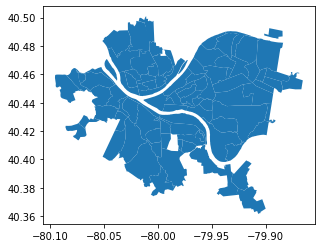

In [6]:
# import dataset
citations = pd.read_csv("Non-Traffic-Citations.csv")

# filter to important info
citations_in_neighborhoods = citations.groupby("NEIGHBORHOOD").size()

d2 = pd.DataFrame({"Number_of_Citations": citations_in_neighborhoods})
d2.reset_index(inplace=True)
d2.columns = ["Neighborhood", "Number_of_Citations"]  # Swap column names for consistency

# Assuming 'hood' is the column you're merging on in neighborhoods
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")  # read in the shapefile
neighborhoods['hood'] = neighborhoods['hood'].astype(str)  # Convert to a common data type

neighborhoods.plot()  # plot the geopandas dataframe

# do the merge
citations_map = neighborhoods.merge(d2, how='left', left_on='hood', right_on='Neighborhood')

# Look at the head to confirm it merged correctly
print(citations_map[['hood', 'Number_of_Citations', 'geometry']].head())

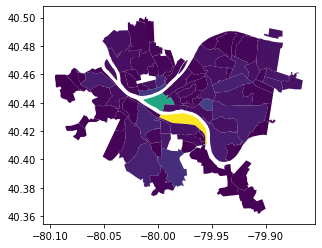

In [7]:
citations_map.plot(column='Number_of_Citations')

#### Code Below - Creates the map with the Data colorized onto the map

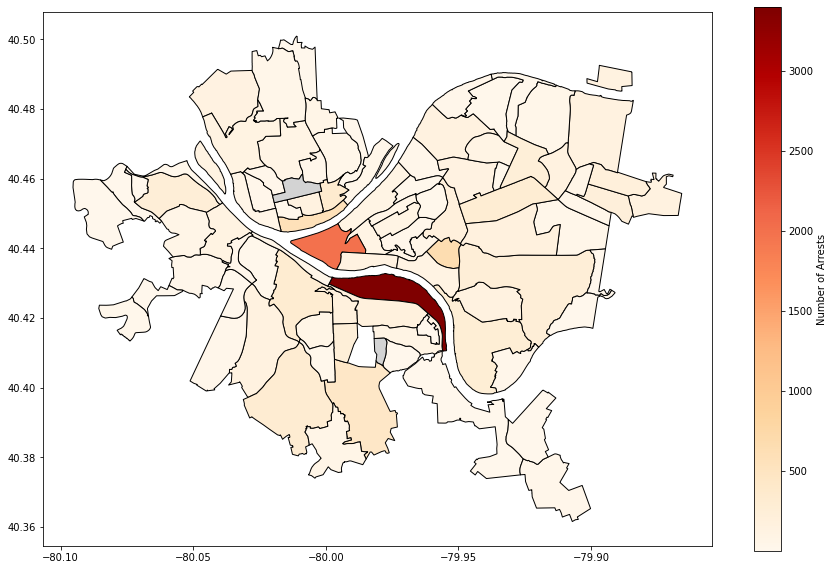

In [9]:
citations_map.plot(column='Number_of_Citations', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="black",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Arrests"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

#### Code Below - Creates a bar graph of all the data

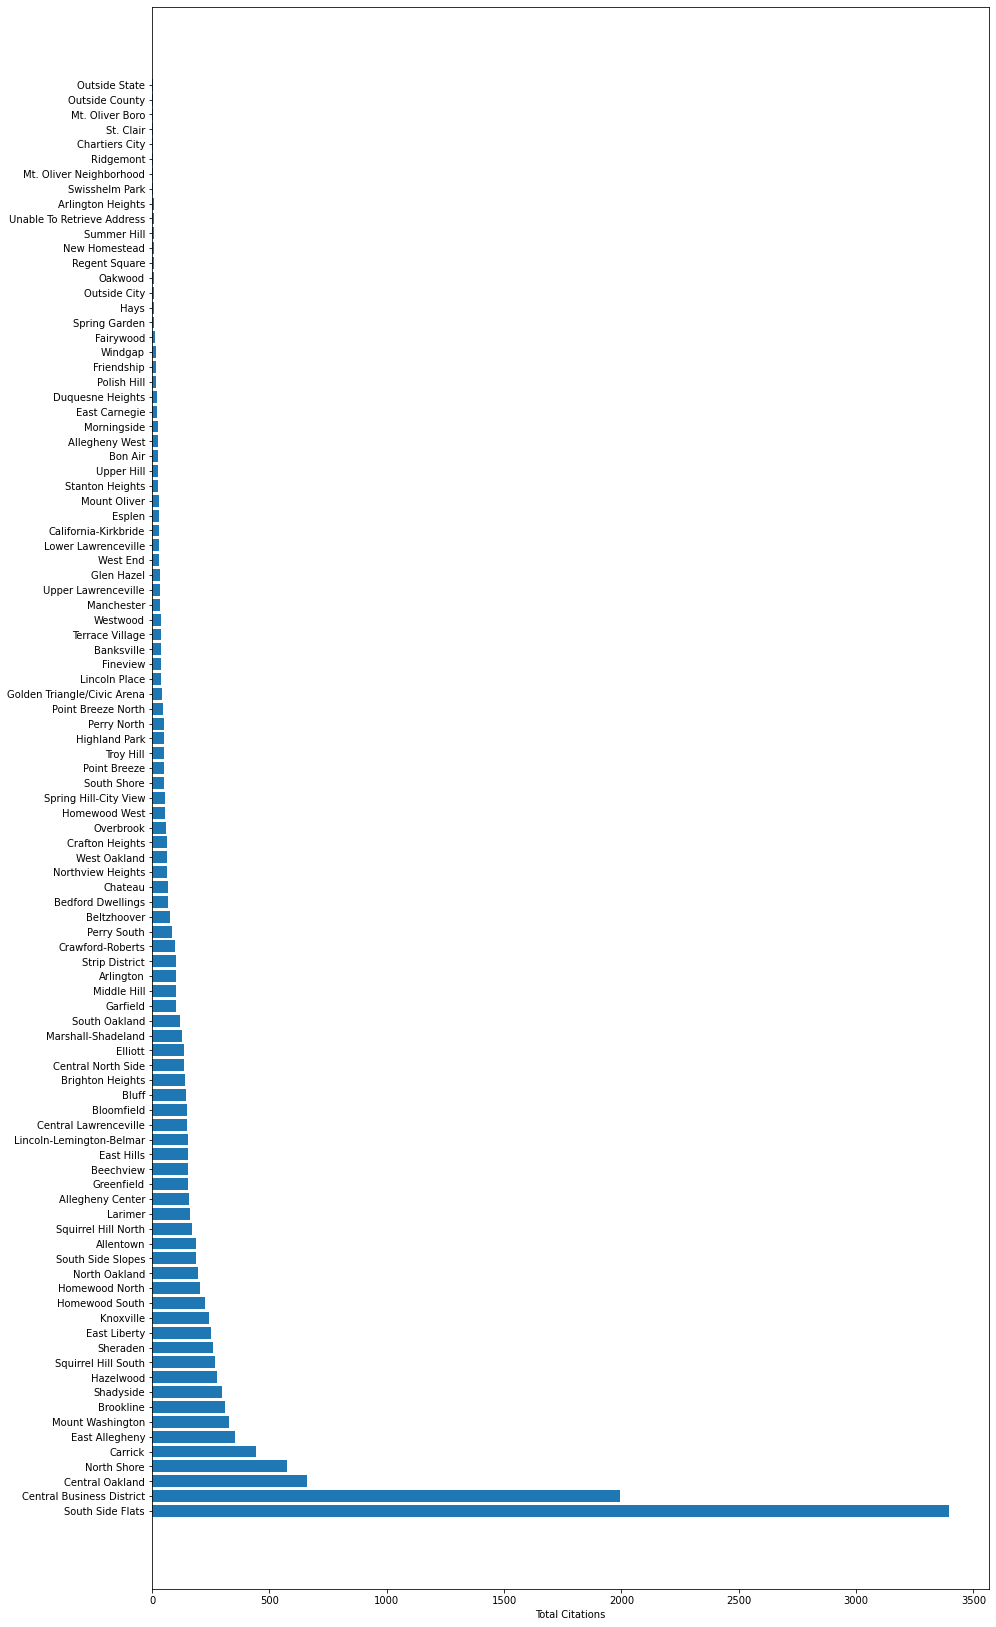

In [10]:
# Convert 'Number_of_Citations' to numeric
d2['Number_of_Citations'] = pd.to_numeric(d2['Number_of_Citations'], errors='coerce')

# Sort the DataFrame by 'Number_of_Arrests' in descending order
d2_sorted = d2.sort_values(by='Number_of_Citations', ascending=False)

# Plotting the horizontal bar graph using Matplotlib directly
plt.figure(figsize=(15, d2_sorted.shape[0] * 0.3))
plt.barh(d2_sorted['Neighborhood'], d2_sorted['Number_of_Citations'])
plt.xlabel("Total Citations")
plt.show()

#### Code-Below Zooms in on the 10 Neighborhoods with the least Total Citations

Text(0.5, 0, 'Total Citations')

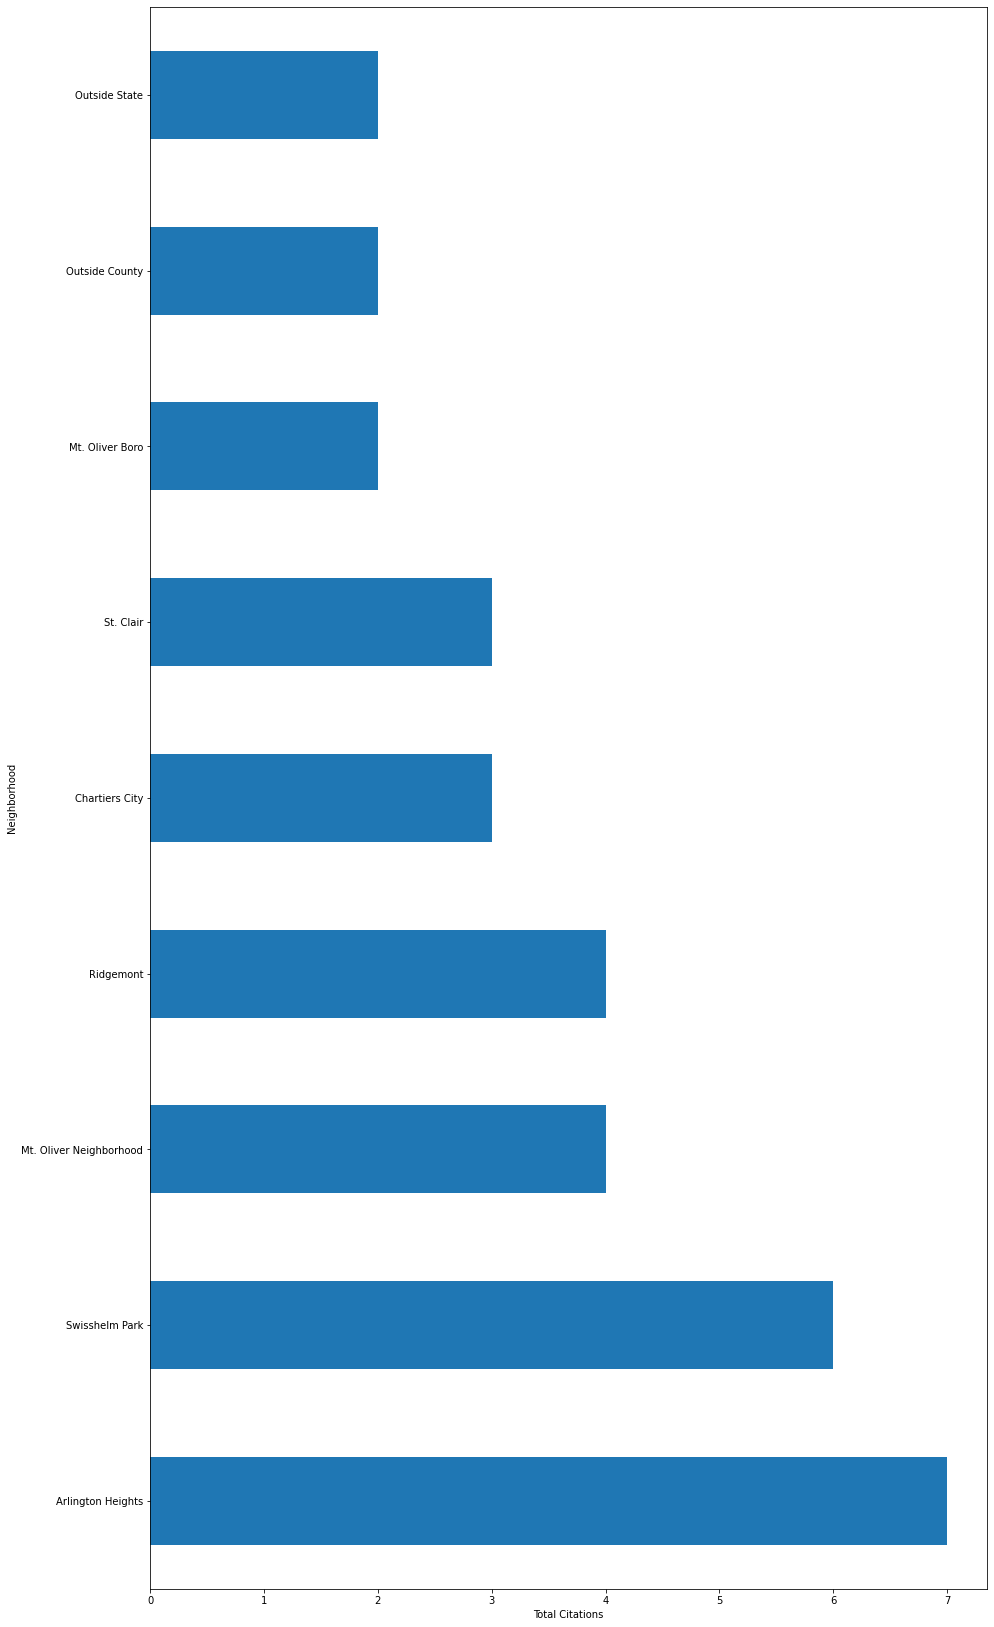

In [11]:
d2_sorted = d2.sort_values(by='Number_of_Citations', ascending=False )
graph = d2_sorted[88:].plot.barh(x="Neighborhood",y="Number_of_Citations",figsize=(15,d2_sorted.shape[0] * 0.3), legend=None)
graph.set_xlabel("Total Citations")